# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = ["ainvert.py", "lena.bmp"]

for f in fileNames:
  if not os.path.exists(f):
    r = requests.get(url + f, allow_redirects=True)
    open(f, 'wb').write(r.content)



#TODO Do samodzielnej implementacji

In [10]:
from ainvert import A_invert

def derivatives(img, i, j):
  ip1 = i + 1 if i + 1 < img.shape[0] else i
  jp1 = j + 1 if j + 1 < img.shape[1] else j
  im1 = i - 1 if i > 0 else 0
  jm1 = j - 1 if j > 0 else 0

  Mx = (img[ip1, j] - img[im1, j]) / 2 

  My = (img[i, jp1] - img[i, jm1]) / 2 

  Mxy = (img[ip1, jp1] - img[im1, j] - img[i, jm1] + img[i, j]) / 4 
  
  return Mx, My, Mxy

def interpolate_bicubic(img, scaleX, scaleY):
  img = img.astype('int16')
  shape = img.shape
  new = np.zeros((int(shape[0]*scaleY), int(shape[1]*scaleX),))

  xratio = 1/scaleX
  yratio = 1/scaleY

  for i in range(new.shape[0]):
    for j in range(new.shape[1]):
      A_x = int(j * xratio) 
      A_y = int(i * yratio) 

      Ax, Ay, Axy = derivatives(img, A_x, A_y) 
      A = img[A_x, A_y]

      B_x = A_x + 1 if A_x + 1 < shape[1] else shape[1] - 1 
      B_y = A_y
      Bx, By, Bxy = derivatives(img, B_x, B_y) 
      B = img[B_x, B_y]

      C_x = A_x
      C_y = A_y + 1 if A_y + 1 < shape[1] else shape[0] - 1 
      Cx, Cy, Cxy = derivatives(img, C_x, C_y) 
      C = img[C_x, C_y]

      D_x = A_x + 1 if A_x + 1 < shape[1] else shape[1] - 1 
      D_y = A_y + 1  if A_y + 1 < shape[0] else shape[0] - 1 
      Dx, Dy, Dxy = derivatives(img, D_x, D_y) 
      D = img[D_x, D_y]

      x = np.transpose(np.array([A, B, C, D, Ax, Bx, Cx, Dx, Ay, By, Cy, Dy, Axy, Bxy, Cxy, Dxy])) 
      a = A_invert @ x 
      a = np.transpose(a.reshape(4,4))

      val = 0
      for k in range(4):
        for l in range(4):
          val += a[k, l] * (j*xratio- A_x)**k * (i*yratio - A_y)**l
      new[i, j] = val

  return np.transpose(new)

def interpolate_bilinear(img, scaleX, scaleY):
  Y, X =  img.shape
  new = np.zeros((int(Y*scaleY), int(X*scaleX),))
  newY, newX = new.shape

  xratio = 1/scaleX
  yratio = 1/scaleY

  for i in range(newY):
    for j in range(newX):

      i1 = int(np.floor(i * yratio))
      j1 = int(np.floor(j * xratio))
      i2 = min(i1 + 1, Y - 1)
      j2 = min(j1 + 1, X - 1)

      fa = img[i1][j1]
      fb = img[i2][j1]
      fc = img[i2][j2]
      fd = img[i1][j2]

      i_frac = i * yratio - i1 
      j_frac = j * xratio - j1 

      X_m = np.array([1-i_frac, i_frac])
      Y_m = np.array([[fa, fd],[fb, fc]])
      Z_m = np.array([[1-j_frac],[j_frac]])
      
      new[i][j] = np.dot(np.dot(X_m, Y_m), Z_m)
  return new


/var/folders/f_/x44pm0s90l561fj6tqrs9qfc0000gn/T/ipykernel_77595/1132498121.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new[i][j] = np.dot(np.dot(X_m, Y_m), Z_m)


Text(0.5, 1.0, 'Bilinear, time: 2226.13 ms')

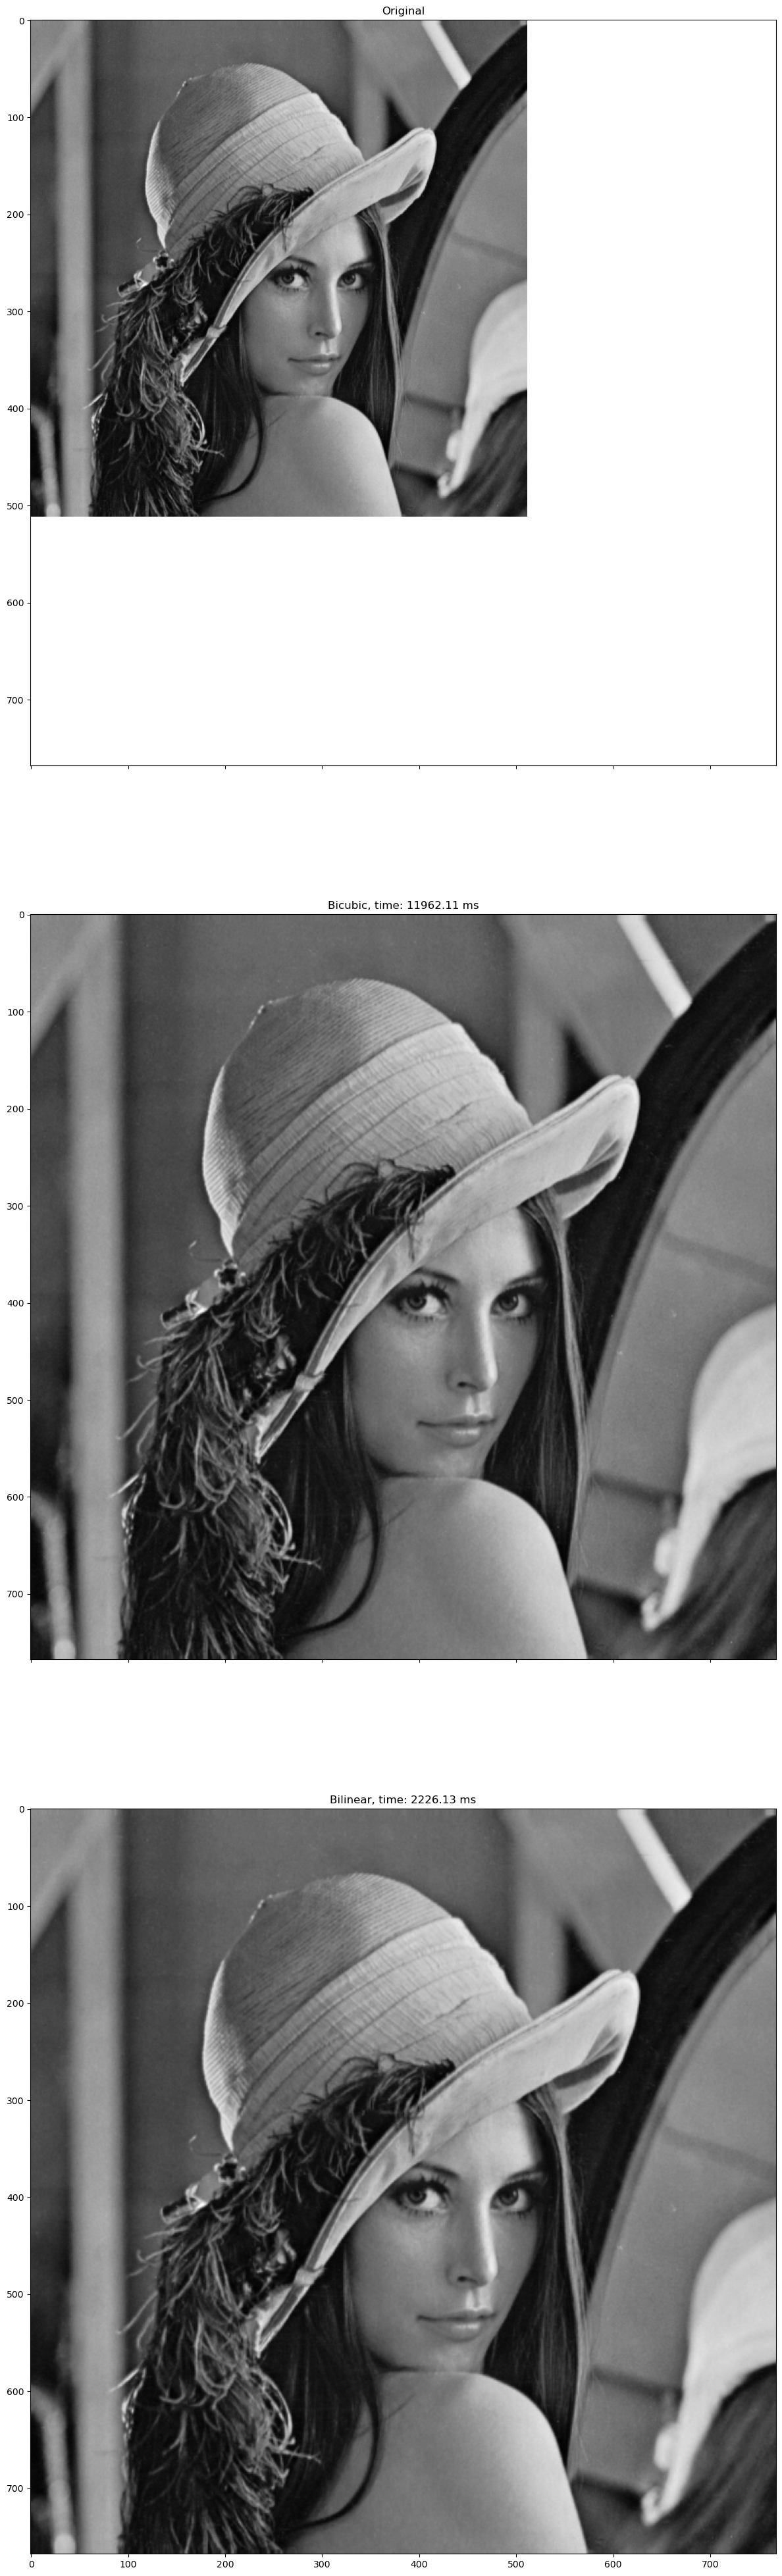

In [11]:
from timeit import default_timer as timer

lena = cv2.imread('lena.bmp')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

start = timer()
bicubic_lena = interpolate_bicubic(lena, 1.5, 1.5)
end = timer()
bicubic_time = (end - start) * 1000

start = timer()
bilinear_lena = interpolate_bilinear(lena, 1.5, 1.5)
end = timer()
bilinear_time = (end - start) * 1000

fig, axes = plt.subplots(3, 1, figsize=(50, 50), sharex=True, sharey=True)
axes[0].imshow(lena, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(bicubic_lena, cmap='gray')
axes[1].set_title(f'Bicubic, time: {bicubic_time:.2f} ms')

axes[2].imshow(bilinear_lena, cmap='gray')
axes[2].set_title(f'Bilinear, time: {bilinear_time:.2f} ms')